importing required libraries.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
from google.colab import files
uploaded = files.upload()

Saving taxi_trip_pricing.csv to taxi_trip_pricing (1).csv


# **EDA**

In [3]:
data = pd.read_csv("taxi_trip_pricing.csv")
data.head()

,Trip_Distance_km,Time_of_Day,Day_of_Week,Passenger_Count,Traffic_Conditions,Weather,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price
0,19.35,Morning,Weekday,3.0,Low,Clear,3.56,0.80,0.32,53.82,36.2624
1,47.59,Afternoon,Weekday,1.0,High,Clear,NaN,0.62,0.43,40.57,NaN
2,36.87,Evening,Weekend,1.0,High,Clear,2.70,1.21,0.15,37.27,52.9032
3,30.33,Evening,Weekday,4.0,Low,NaN,3.48,0.51,0.15,116.81,36.4698
4,NaN,Evening,Weekday,3.0,High,Clear,2.93,0.63,0.32,22.64,15.6180


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Trip_Distance_km       950 non-null    float64
 1   Time_of_Day            950 non-null    object 
 2   Day_of_Week            950 non-null    object 
 3   Passenger_Count        950 non-null    float64
 4   Traffic_Conditions     950 non-null    object 
 5   Weather                950 non-null    object 
 6   Base_Fare              950 non-null    float64
 7   Per_Km_Rate            950 non-null    float64
 8   Per_Minute_Rate        950 non-null    float64
 9   Trip_Duration_Minutes  950 non-null    float64
 10  Trip_Price             951 non-null    float64
dtypes: float64(7), object(4)
memory usage: 86.1+ KB


In [5]:
data.describe()

,Trip_Distance_km,Passenger_Count,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price
count,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,951.000000
mean,27.070547,2.476842,3.502989,1.233316,0.292916,62.118116,56.874773
std,19.905300,1.102249,0.870162,0.429816,0.115592,32.154406,40.469791
min,1.230000,1.000000,2.010000,0.500000,0.100000,5.010000,6.126900
25%,12.632500,1.250000,2.730000,0.860000,0.190000,35.882500,33.742650
50%,25.830000,2.000000,3.520000,1.220000,0.290000,61.860000,50.074500
75%,38.405000,3.000000,4.260000,1.610000,0.390000,89.055000,69.099350
max,146.067047,4.000000,5.000000,2.000000,0.500000,119.840000,332.043689


In [6]:
data.shape

(1000, 11)

In [7]:
data.sample(5)

,Trip_Distance_km,Time_of_Day,Day_of_Week,Passenger_Count,Traffic_Conditions,Weather,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price
149,14.65,Evening,Weekend,2.0,High,Clear,3.74,1.79,NaN,29.58,40.0207
731,40.91,Afternoon,Weekday,1.0,Medium,Clear,4.73,1.16,0.28,19.10,57.5336
178,46.90,Evening,Weekday,1.0,High,Clear,4.14,1.33,0.13,66.38,NaN
732,33.59,Afternoon,Weekday,1.0,Low,Rain,3.66,0.57,0.42,111.71,69.7245
254,9.31,Afternoon,Weekend,2.0,Low,Rain,4.73,0.50,0.20,115.15,32.4150


In [8]:
data.dtypes

,0
Trip_Distance_km,float64
Time_of_Day,object
Day_of_Week,object
Passenger_Count,float64
Traffic_Conditions,object
Weather,object
Base_Fare,float64
Per_Km_Rate,float64
Per_Minute_Rate,float64
Trip_Duration_Minutes,float64


In [9]:
data.duplicated().sum()  #checking the duplicate values

0

In [10]:
data.isnull().sum()  #looking if there's any null values in the data or not

,0
Trip_Distance_km,50
Time_of_Day,50
Day_of_Week,50
Passenger_Count,50
Traffic_Conditions,50
Weather,50
Base_Fare,50
Per_Km_Rate,50
Per_Minute_Rate,50
Trip_Duration_Minutes,50


we can see that both the numerical and categorical column has null values, we would fill the null values using the median and most_frequent strategy of numerical and categorical columns.

In [11]:
data['Time_of_Day'].fillna(data['Time_of_Day'].mode()[0], inplace=True)


<ipython-input-11-30884b6e9cf8>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Time_of_Day'].fillna(data['Time_of_Day'].mode()[0], inplace=True)


In [12]:
data['Day_of_Week'].fillna(data['Day_of_Week'].mode()[0], inplace=True)


<ipython-input-12-56a6bc67eac7>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Day_of_Week'].fillna(data['Day_of_Week'].mode()[0], inplace=True)


In [13]:
data['Traffic_Conditions'].fillna(data['Traffic_Conditions'].mode()[0], inplace = True)

<ipython-input-13-e74197d00edc>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Traffic_Conditions'].fillna(data['Traffic_Conditions'].mode()[0], inplace = True)


In [14]:
data['Weather'].fillna(data['Weather'].mode()[0],inplace = True)

<ipython-input-14-0e1e5009fa4f>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Weather'].fillna(data['Weather'].mode()[0],inplace = True)


In [15]:
data.isnull().sum()

,0
Trip_Distance_km,50
Time_of_Day,0
Day_of_Week,0
Passenger_Count,50
Traffic_Conditions,0
Weather,0
Base_Fare,50
Per_Km_Rate,50
Per_Minute_Rate,50
Trip_Duration_Minutes,50


In [16]:
data['Trip_Distance_km'].fillna(data['Trip_Distance_km'].median(),inplace=True)

<ipython-input-16-339cbc7cb43d>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Trip_Distance_km'].fillna(data['Trip_Distance_km'].median(),inplace=True)


In [17]:
data['Passenger_Count'].fillna(data['Passenger_Count'].median(),inplace = True)

<ipython-input-17-473c64b925fb>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Passenger_Count'].fillna(data['Passenger_Count'].median(),inplace = True)


In [18]:
data['Base_Fare'].fillna(data['Base_Fare'].median(),inplace = True)

<ipython-input-18-2f2b169378dc>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Base_Fare'].fillna(data['Base_Fare'].median(),inplace = True)


In [19]:
data['Per_Km_Rate'].fillna(data['Per_Km_Rate'].median(),inplace = True)

<ipython-input-19-94937ff8be33>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Per_Km_Rate'].fillna(data['Per_Km_Rate'].median(),inplace = True)


In [20]:
data['Per_Minute_Rate'].fillna(data['Per_Minute_Rate'].median(),inplace = True)

<ipython-input-20-f0e3890523ef>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Per_Minute_Rate'].fillna(data['Per_Minute_Rate'].median(),inplace = True)


In [21]:
data['Trip_Duration_Minutes'].fillna(data['Trip_Duration_Minutes'].median(),inplace=True)

<ipython-input-21-682f5c7e2e01>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Trip_Duration_Minutes'].fillna(data['Trip_Duration_Minutes'].median(),inplace=True)


In [22]:
data['Trip_Price'].fillna(data['Trip_Price'].median(),inplace=True)

<ipython-input-22-52a66104aa17>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Trip_Price'].fillna(data['Trip_Price'].median(),inplace=True)


In [23]:
data.isnull().sum()   #checking for the null values, after treating them.

,0
Trip_Distance_km,0
Time_of_Day,0
Day_of_Week,0
Passenger_Count,0
Traffic_Conditions,0
Weather,0
Base_Fare,0
Per_Km_Rate,0
Per_Minute_Rate,0
Trip_Duration_Minutes,0


looks like we have treated the null values as we don't see any in any columns.

The next step would be looking for outliers and then removing them so that we can see a clear view of the data.

In [24]:
data.dtypes #checking for datatype of each dimension

,0
Trip_Distance_km,float64
Time_of_Day,object
Day_of_Week,object
Passenger_Count,float64
Traffic_Conditions,object
Weather,object
Base_Fare,float64
Per_Km_Rate,float64
Per_Minute_Rate,float64
Trip_Duration_Minutes,float64


In [25]:
#separating numerical and categorical columns first.
numC = data.select_dtypes(include = "float64").columns
catC = data.select_dtypes(include = "object").columns

In [26]:
numC

Index(['Trip_Distance_km', 'Passenger_Count', 'Base_Fare', 'Per_Km_Rate',
       'Per_Minute_Rate', 'Trip_Duration_Minutes', 'Trip_Price'],
      dtype='object')

In [27]:
catC

Index(['Time_of_Day', 'Day_of_Week', 'Traffic_Conditions', 'Weather'], dtype='object')

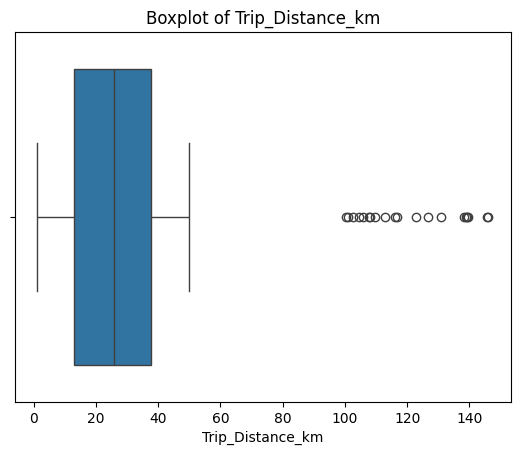

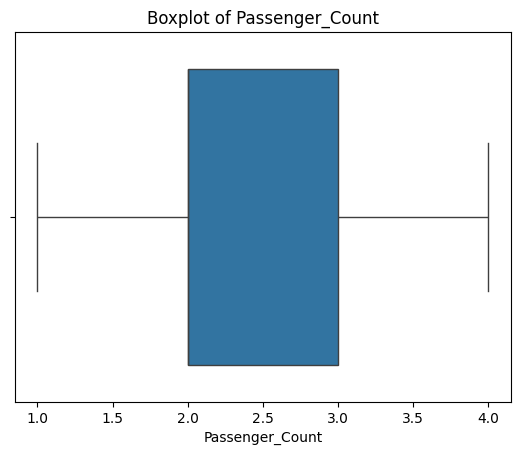

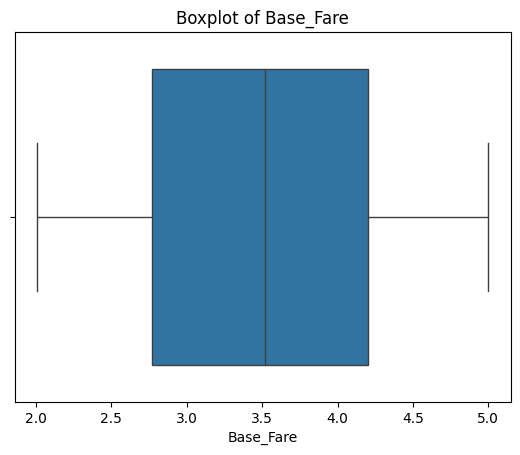

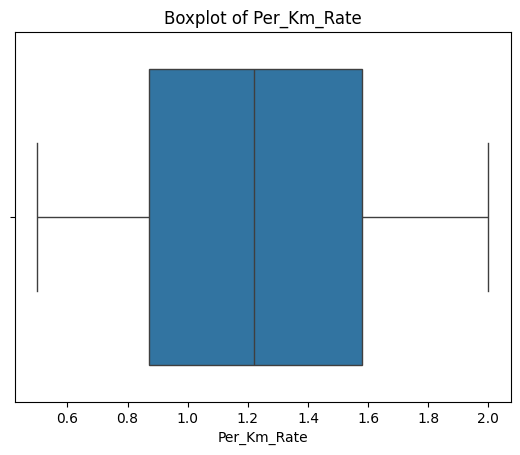

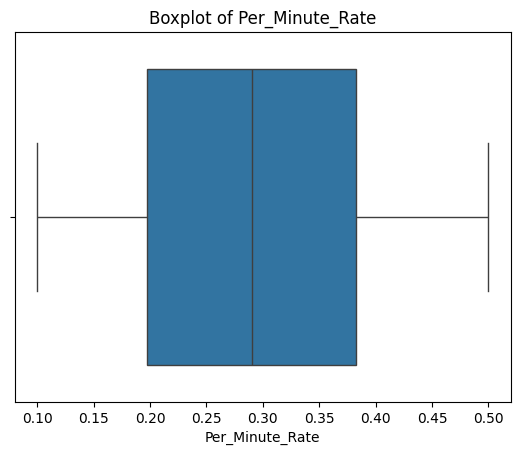

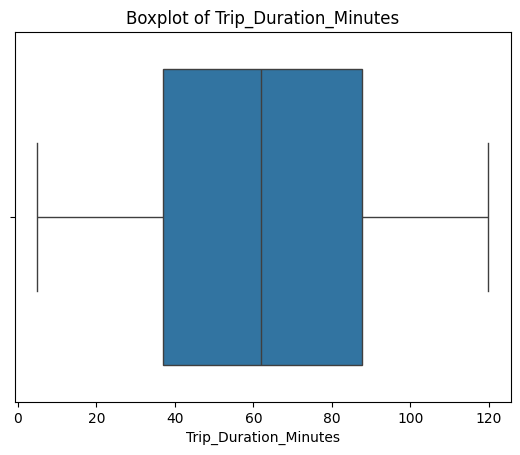

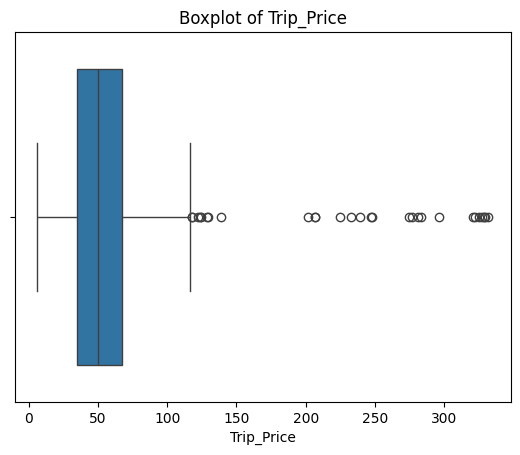

In [28]:
'''plotting boxplots for numerical columns to detect ouliers'''
for i in numC:
  sns.boxplot(x = data[i])
  plt.title(f"Boxplot of {i}")
  plt.show()

we can see some outliers in few numerical columns, would be removing them using the IQR method.


In [29]:
'''defining a function to calculate the inter quartile range for each column so that
   it would be we would be able to remove the outliers and the data would be cleaned enough for further analysis'''
def iqr(data, numC):
  Q1 = data[numC].quantile(0.25)
  Q3 = data[numC].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5*IQR
  upper_bound = Q3 + 1.5*IQR
  cleaned_data = data[(data[numC] >= lower_bound) & (data[numC] <= upper_bound)]
  return cleaned_data

for col in numC:
    print(f"Processing column: {col}")
    data = iqr(data, col)


Processing column: Trip_Distance_km
Processing column: Passenger_Count
Processing column: Base_Fare
Processing column: Per_Km_Rate
Processing column: Per_Minute_Rate
Processing column: Trip_Duration_Minutes
Processing column: Trip_Price


In [30]:
data.shape

(970, 11)

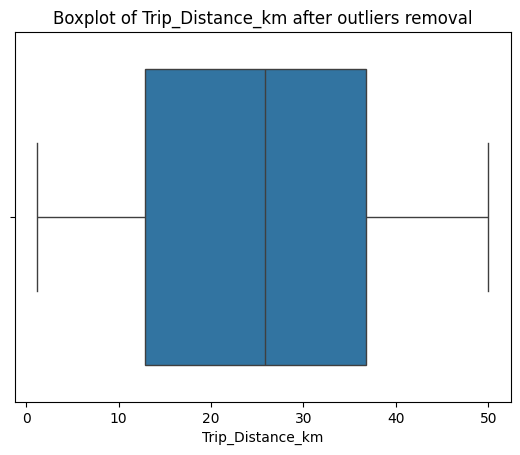

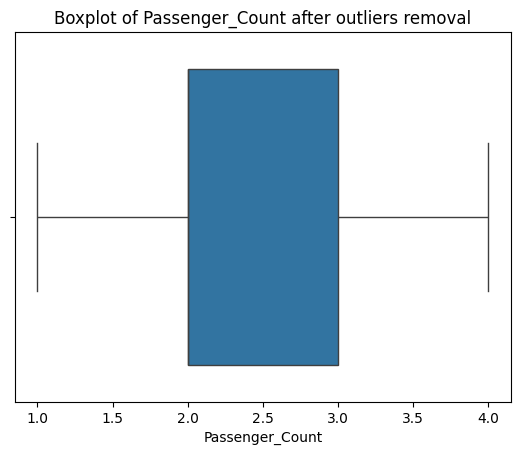

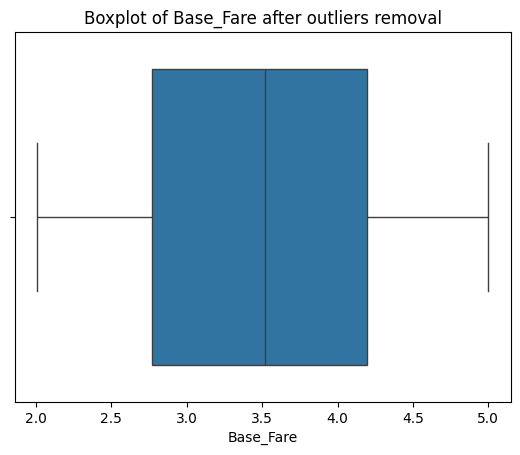

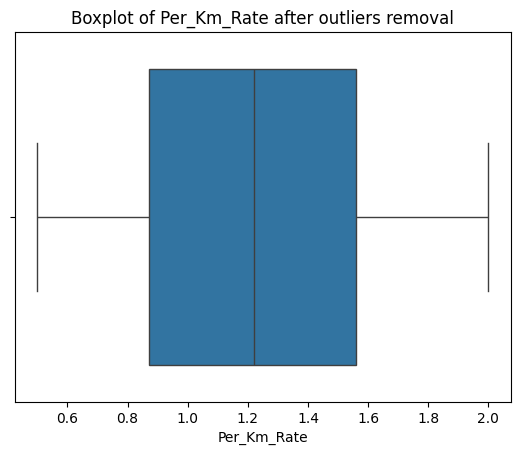

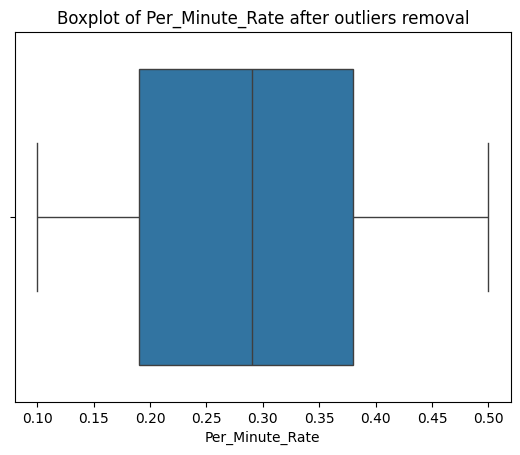

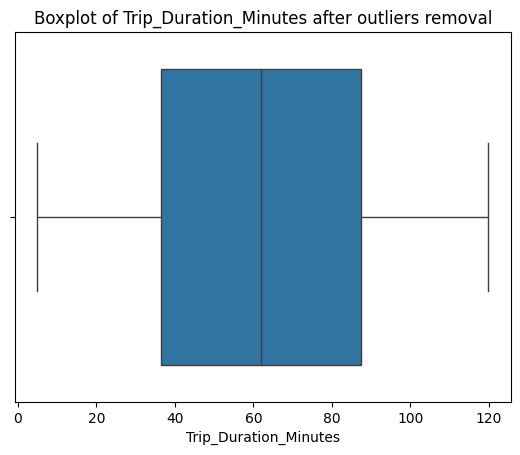

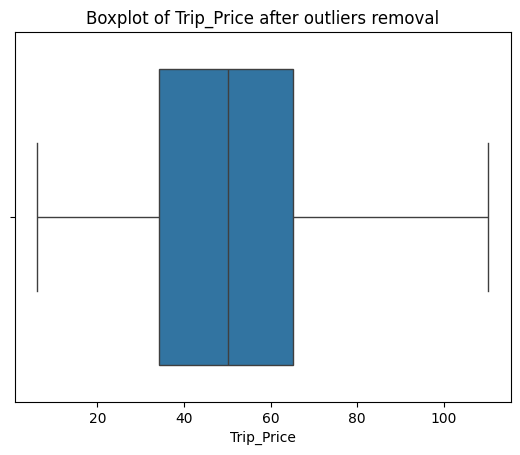

In [31]:
'''plotting boxplots after outliers removal to check if there's any outliers left'''
for i in numC:
  sns.boxplot(x = data[i])
  plt.title(f"Boxplot of {i} after outliers removal")
  plt.show()

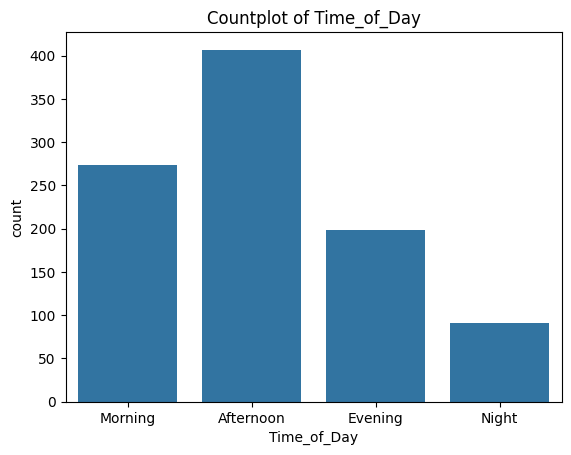

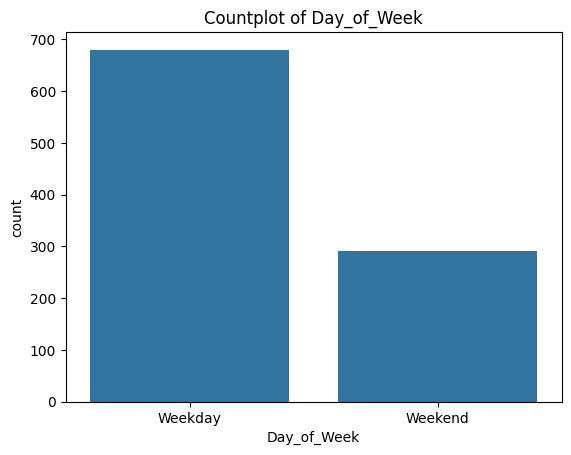

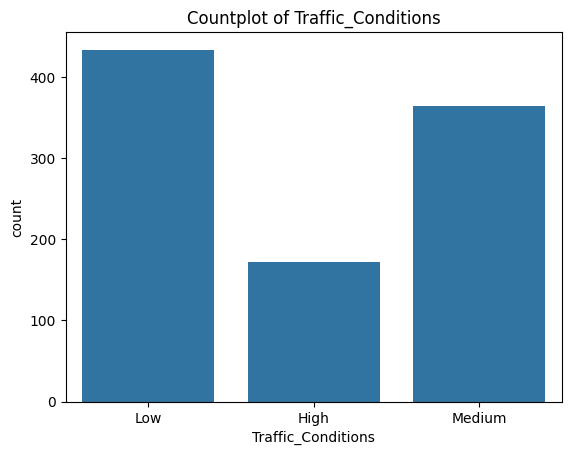

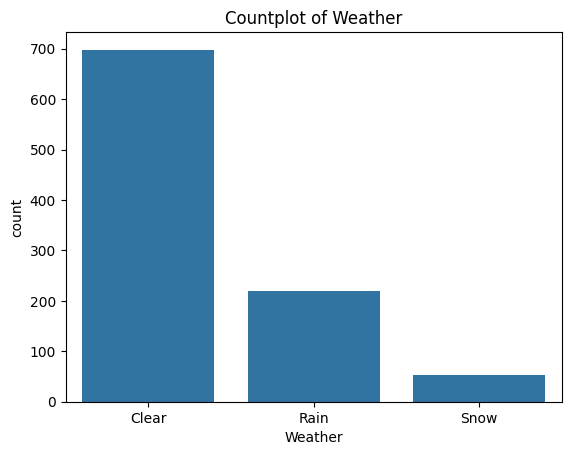

In [32]:
''' plotting countplot for categorical columns to see the frequency of categories in each column'''
for i in catC:
  sns.countplot(x=data[i])
  plt.title(f"Countplot of {i}")
  plt.show()

In [33]:
data.isnull().sum()   #checking for null values after imputation and outliers removal

,0
Trip_Distance_km,0
Time_of_Day,0
Day_of_Week,0
Passenger_Count,0
Traffic_Conditions,0
Weather,0
Base_Fare,0
Per_Km_Rate,0
Per_Minute_Rate,0
Trip_Duration_Minutes,0


Looks like we have overcome the problems regarding null values and outliers as we have treated them both with respective solutions.

Proceeding to the **TRAIN TEST SPLIT**

In [34]:
'''before proceeding to train test split of the data, we need to separate the dependent and independent variables.
X would be the independent variables and y is the dependent variable.'''
X = data.iloc[:,0:10]
y = data.iloc[:,10:]

In [35]:
X.columns    #looking for just independent columns

Index(['Trip_Distance_km', 'Time_of_Day', 'Day_of_Week', 'Passenger_Count',
       'Traffic_Conditions', 'Weather', 'Base_Fare', 'Per_Km_Rate',
       'Per_Minute_Rate', 'Trip_Duration_Minutes'],
      dtype='object')

In [36]:
y.columns     #looking for dependent(target) column

Index(['Trip_Price'], dtype='object')

In [37]:
#importing the train test split using sklearn library
from sklearn.model_selection import train_test_split

In [38]:
#setting up the train and test data(keeping 80% of the data as training data and 20% of the data as test data)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [39]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((776, 10), (194, 10), (776, 1), (194, 1))

In [40]:
num = X.select_dtypes(include='float64').columns
cat = X.select_dtypes(include = 'object').columns

In [41]:
num

Index(['Trip_Distance_km', 'Passenger_Count', 'Base_Fare', 'Per_Km_Rate',
       'Per_Minute_Rate', 'Trip_Duration_Minutes'],
      dtype='object')

In [42]:
cat

Index(['Time_of_Day', 'Day_of_Week', 'Traffic_Conditions', 'Weather'], dtype='object')

In [43]:
from sklearn.preprocessing import StandardScaler

**STANDARDIZATION** ON X_train_num

In [44]:
scaler = StandardScaler()

In [45]:
X_train_num = scaler.fit_transform(X_train[num])

In [46]:
X_train_num = pd.DataFrame(scaler.transform(X_train[num]),columns=X_train[num].columns)

In [47]:
X_train_num

,Trip_Distance_km,Passenger_Count,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes
0,0.478726,0.495563,-1.457962,1.205952,1.108111,-0.674708
1,1.408834,-0.424429,1.730456,1.181452,-0.489051,-0.076252
2,0.025948,1.415555,0.106615,1.426450,0.575724,-0.776254
3,-1.239229,-0.424429,-0.272677,-1.440026,1.374304,0.009059
4,-0.938822,-0.424429,1.564516,0.642457,-0.222857,0.290460
...,...,...,...,...,...,...
771,0.062777,-0.424429,0.616287,1.034453,-1.110169,1.534165
772,-0.534427,-1.344421,-0.320088,-0.019038,-1.642556,1.339667
773,0.825350,1.415555,-1.457962,0.593457,0.398261,1.673592
774,-0.228965,-0.424429,1.042990,-0.141537,0.398261,-1.781531


**STANDARDIZATION** on X_test_num

In [48]:
X_test_num = scaler.transform(X_test[num])

In [49]:
X_test_num = pd.DataFrame(scaler.transform(X_test[num]),columns=X_test[num].columns)

In [50]:
X_test_num

,Trip_Distance_km,Passenger_Count,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes
0,-1.120799,-1.344421,1.268194,-1.611524,-1.021438,-1.485169
1,0.062777,0.495563,1.481546,-0.582533,0.841917,-1.177983
2,1.194360,0.495563,-0.426764,0.593457,1.108111,0.964677
3,-1.569966,0.495563,-0.154148,-0.019038,0.664455,-0.873025
4,1.155365,-1.344421,0.533317,1.450950,0.930648,-0.817637
...,...,...,...,...,...,...
189,-0.452826,0.495563,1.671191,1.377450,-1.110169,0.567723
190,-1.278946,0.495563,-1.529079,0.568957,-1.465094,0.628842
191,1.099761,-1.344421,-0.829761,-0.264036,-1.731287,-0.330596
192,1.130090,-1.344421,-1.398698,-0.852031,0.753186,-0.615180


**ONE-HOT ENCODING** for X_train_cat

In [51]:
from sklearn.preprocessing import OneHotEncoder

In [52]:
X_train_cat = pd.get_dummies(X_train[cat]).astype("int64")

In [53]:
X_train_cat

,Time_of_Day_Afternoon,Time_of_Day_Evening,Time_of_Day_Morning,Time_of_Day_Night,Day_of_Week_Weekday,Day_of_Week_Weekend,Traffic_Conditions_High,Traffic_Conditions_Low,Traffic_Conditions_Medium,Weather_Clear,Weather_Rain,Weather_Snow
749,0,0,1,0,1,0,1,0,0,1,0,0
198,0,1,0,0,1,0,1,0,0,1,0,0
978,0,1,0,0,0,1,0,0,1,0,1,0
590,1,0,0,0,0,1,0,0,1,1,0,0
468,0,1,0,0,1,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
111,0,0,1,0,1,0,0,1,0,1,0,0
281,0,1,0,0,1,0,0,1,0,1,0,0
890,0,0,1,0,1,0,0,1,0,1,0,0
452,0,1,0,0,1,0,1,0,0,1,0,0


**ONE-HOT ENCODING** for X_test_cat

In [54]:
X_test_cat = pd.get_dummies(X_test[cat]).astype("int64")

In [55]:
X_test_cat

,Time_of_Day_Afternoon,Time_of_Day_Evening,Time_of_Day_Morning,Time_of_Day_Night,Day_of_Week_Weekday,Day_of_Week_Weekend,Traffic_Conditions_High,Traffic_Conditions_Low,Traffic_Conditions_Medium,Weather_Clear,Weather_Rain,Weather_Snow
597,0,0,1,0,1,0,0,1,0,1,0,0
269,0,0,1,0,1,0,0,1,0,1,0,0
403,0,1,0,0,1,0,0,1,0,1,0,0
514,0,0,1,0,1,0,0,1,0,1,0,0
73,0,0,1,0,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
994,0,1,0,0,1,0,0,0,1,1,0,0
772,1,0,0,0,0,1,0,1,0,1,0,0
923,1,0,0,0,1,0,0,0,1,1,0,0
35,1,0,0,0,1,0,0,1,0,1,0,0


looks like we are done with the standardization and dummification of numerical and categorical data respectively.

Moving forward to get the final test and train data by concatnating the X_train_num and X_train_cat, X_test_num and X_test_cat

In [56]:
X_train_num = X_train_num.reset_index()
X_train_num

,index,Trip_Distance_km,Passenger_Count,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes
0,0,0.478726,0.495563,-1.457962,1.205952,1.108111,-0.674708
1,1,1.408834,-0.424429,1.730456,1.181452,-0.489051,-0.076252
2,2,0.025948,1.415555,0.106615,1.426450,0.575724,-0.776254
3,3,-1.239229,-0.424429,-0.272677,-1.440026,1.374304,0.009059
4,4,-0.938822,-0.424429,1.564516,0.642457,-0.222857,0.290460
...,...,...,...,...,...,...,...
771,771,0.062777,-0.424429,0.616287,1.034453,-1.110169,1.534165
772,772,-0.534427,-1.344421,-0.320088,-0.019038,-1.642556,1.339667
773,773,0.825350,1.415555,-1.457962,0.593457,0.398261,1.673592
774,774,-0.228965,-0.424429,1.042990,-0.141537,0.398261,-1.781531


In [57]:
X_train_num = X_train_num.drop('index',axis=1)
X_train_num

,Trip_Distance_km,Passenger_Count,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes
0,0.478726,0.495563,-1.457962,1.205952,1.108111,-0.674708
1,1.408834,-0.424429,1.730456,1.181452,-0.489051,-0.076252
2,0.025948,1.415555,0.106615,1.426450,0.575724,-0.776254
3,-1.239229,-0.424429,-0.272677,-1.440026,1.374304,0.009059
4,-0.938822,-0.424429,1.564516,0.642457,-0.222857,0.290460
...,...,...,...,...,...,...
771,0.062777,-0.424429,0.616287,1.034453,-1.110169,1.534165
772,-0.534427,-1.344421,-0.320088,-0.019038,-1.642556,1.339667
773,0.825350,1.415555,-1.457962,0.593457,0.398261,1.673592
774,-0.228965,-0.424429,1.042990,-0.141537,0.398261,-1.781531


In [58]:
X_test_num = X_test_num.reset_index()
X_test_num

,index,Trip_Distance_km,Passenger_Count,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes
0,0,-1.120799,-1.344421,1.268194,-1.611524,-1.021438,-1.485169
1,1,0.062777,0.495563,1.481546,-0.582533,0.841917,-1.177983
2,2,1.194360,0.495563,-0.426764,0.593457,1.108111,0.964677
3,3,-1.569966,0.495563,-0.154148,-0.019038,0.664455,-0.873025
4,4,1.155365,-1.344421,0.533317,1.450950,0.930648,-0.817637
...,...,...,...,...,...,...,...
189,189,-0.452826,0.495563,1.671191,1.377450,-1.110169,0.567723
190,190,-1.278946,0.495563,-1.529079,0.568957,-1.465094,0.628842
191,191,1.099761,-1.344421,-0.829761,-0.264036,-1.731287,-0.330596
192,192,1.130090,-1.344421,-1.398698,-0.852031,0.753186,-0.615180


In [59]:
X_test_num = X_test_num.drop('index',axis=1)
X_test_num

,Trip_Distance_km,Passenger_Count,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes
0,-1.120799,-1.344421,1.268194,-1.611524,-1.021438,-1.485169
1,0.062777,0.495563,1.481546,-0.582533,0.841917,-1.177983
2,1.194360,0.495563,-0.426764,0.593457,1.108111,0.964677
3,-1.569966,0.495563,-0.154148,-0.019038,0.664455,-0.873025
4,1.155365,-1.344421,0.533317,1.450950,0.930648,-0.817637
...,...,...,...,...,...,...
189,-0.452826,0.495563,1.671191,1.377450,-1.110169,0.567723
190,-1.278946,0.495563,-1.529079,0.568957,-1.465094,0.628842
191,1.099761,-1.344421,-0.829761,-0.264036,-1.731287,-0.330596
192,1.130090,-1.344421,-1.398698,-0.852031,0.753186,-0.615180


In [60]:
X_train_cat = X_train_cat.reset_index()

In [61]:
X_train_cat

,index,Time_of_Day_Afternoon,Time_of_Day_Evening,Time_of_Day_Morning,Time_of_Day_Night,Day_of_Week_Weekday,Day_of_Week_Weekend,Traffic_Conditions_High,Traffic_Conditions_Low,Traffic_Conditions_Medium,Weather_Clear,Weather_Rain,Weather_Snow
0,749,0,0,1,0,1,0,1,0,0,1,0,0
1,198,0,1,0,0,1,0,1,0,0,1,0,0
2,978,0,1,0,0,0,1,0,0,1,0,1,0
3,590,1,0,0,0,0,1,0,0,1,1,0,0
4,468,0,1,0,0,1,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
771,111,0,0,1,0,1,0,0,1,0,1,0,0
772,281,0,1,0,0,1,0,0,1,0,1,0,0
773,890,0,0,1,0,1,0,0,1,0,1,0,0
774,452,0,1,0,0,1,0,1,0,0,1,0,0


In [62]:
X_train_cat = X_train_cat.drop('index',axis=1)
X_train_cat

,Time_of_Day_Afternoon,Time_of_Day_Evening,Time_of_Day_Morning,Time_of_Day_Night,Day_of_Week_Weekday,Day_of_Week_Weekend,Traffic_Conditions_High,Traffic_Conditions_Low,Traffic_Conditions_Medium,Weather_Clear,Weather_Rain,Weather_Snow
0,0,0,1,0,1,0,1,0,0,1,0,0
1,0,1,0,0,1,0,1,0,0,1,0,0
2,0,1,0,0,0,1,0,0,1,0,1,0
3,1,0,0,0,0,1,0,0,1,1,0,0
4,0,1,0,0,1,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
771,0,0,1,0,1,0,0,1,0,1,0,0
772,0,1,0,0,1,0,0,1,0,1,0,0
773,0,0,1,0,1,0,0,1,0,1,0,0
774,0,1,0,0,1,0,1,0,0,1,0,0


In [63]:
X_test_cat = X_test_cat.reset_index()
X_test_cat

,index,Time_of_Day_Afternoon,Time_of_Day_Evening,Time_of_Day_Morning,Time_of_Day_Night,Day_of_Week_Weekday,Day_of_Week_Weekend,Traffic_Conditions_High,Traffic_Conditions_Low,Traffic_Conditions_Medium,Weather_Clear,Weather_Rain,Weather_Snow
0,597,0,0,1,0,1,0,0,1,0,1,0,0
1,269,0,0,1,0,1,0,0,1,0,1,0,0
2,403,0,1,0,0,1,0,0,1,0,1,0,0
3,514,0,0,1,0,1,0,0,1,0,1,0,0
4,73,0,0,1,0,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
189,994,0,1,0,0,1,0,0,0,1,1,0,0
190,772,1,0,0,0,0,1,0,1,0,1,0,0
191,923,1,0,0,0,1,0,0,0,1,1,0,0
192,35,1,0,0,0,1,0,0,1,0,1,0,0


In [64]:
X_test_cat = X_test_cat.drop('index',axis=1)
X_test_cat

,Time_of_Day_Afternoon,Time_of_Day_Evening,Time_of_Day_Morning,Time_of_Day_Night,Day_of_Week_Weekday,Day_of_Week_Weekend,Traffic_Conditions_High,Traffic_Conditions_Low,Traffic_Conditions_Medium,Weather_Clear,Weather_Rain,Weather_Snow
0,0,0,1,0,1,0,0,1,0,1,0,0
1,0,0,1,0,1,0,0,1,0,1,0,0
2,0,1,0,0,1,0,0,1,0,1,0,0
3,0,0,1,0,1,0,0,1,0,1,0,0
4,0,0,1,0,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
189,0,1,0,0,1,0,0,0,1,1,0,0
190,1,0,0,0,0,1,0,1,0,1,0,0
191,1,0,0,0,1,0,0,0,1,1,0,0
192,1,0,0,0,1,0,0,1,0,1,0,0


In [65]:
final_X_train = pd.concat([X_train_num,X_train_cat],axis=1)
final_X_train

,Trip_Distance_km,Passenger_Count,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Time_of_Day_Afternoon,Time_of_Day_Evening,Time_of_Day_Morning,Time_of_Day_Night,Day_of_Week_Weekday,Day_of_Week_Weekend,Traffic_Conditions_High,Traffic_Conditions_Low,Traffic_Conditions_Medium,Weather_Clear,Weather_Rain,Weather_Snow
0,0.478726,0.495563,-1.457962,1.205952,1.108111,-0.674708,0,0,1,0,1,0,1,0,0,1,0,0
1,1.408834,-0.424429,1.730456,1.181452,-0.489051,-0.076252,0,1,0,0,1,0,1,0,0,1,0,0
2,0.025948,1.415555,0.106615,1.426450,0.575724,-0.776254,0,1,0,0,0,1,0,0,1,0,1,0
3,-1.239229,-0.424429,-0.272677,-1.440026,1.374304,0.009059,1,0,0,0,0,1,0,0,1,1,0,0
4,-0.938822,-0.424429,1.564516,0.642457,-0.222857,0.290460,0,1,0,0,1,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
771,0.062777,-0.424429,0.616287,1.034453,-1.110169,1.534165,0,0,1,0,1,0,0,1,0,1,0,0
772,-0.534427,-1.344421,-0.320088,-0.019038,-1.642556,1.339667,0,1,0,0,1,0,0,1,0,1,0,0
773,0.825350,1.415555,-1.457962,0.593457,0.398261,1.673592,0,0,1,0,1,0,0,1,0,1,0,0
774,-0.228965,-0.424429,1.042990,-0.141537,0.398261,-1.781531,0,1,0,0,1,0,1,0,0,1,0,0


In [66]:
final_X_test = pd.concat([X_test_num,X_test_cat],axis=1)
final_X_test

,Trip_Distance_km,Passenger_Count,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Time_of_Day_Afternoon,Time_of_Day_Evening,Time_of_Day_Morning,Time_of_Day_Night,Day_of_Week_Weekday,Day_of_Week_Weekend,Traffic_Conditions_High,Traffic_Conditions_Low,Traffic_Conditions_Medium,Weather_Clear,Weather_Rain,Weather_Snow
0,-1.120799,-1.344421,1.268194,-1.611524,-1.021438,-1.485169,0,0,1,0,1,0,0,1,0,1,0,0
1,0.062777,0.495563,1.481546,-0.582533,0.841917,-1.177983,0,0,1,0,1,0,0,1,0,1,0,0
2,1.194360,0.495563,-0.426764,0.593457,1.108111,0.964677,0,1,0,0,1,0,0,1,0,1,0,0
3,-1.569966,0.495563,-0.154148,-0.019038,0.664455,-0.873025,0,0,1,0,1,0,0,1,0,1,0,0
4,1.155365,-1.344421,0.533317,1.450950,0.930648,-0.817637,0,0,1,0,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
189,-0.452826,0.495563,1.671191,1.377450,-1.110169,0.567723,0,1,0,0,1,0,0,0,1,1,0,0
190,-1.278946,0.495563,-1.529079,0.568957,-1.465094,0.628842,1,0,0,0,0,1,0,1,0,1,0,0
191,1.099761,-1.344421,-0.829761,-0.264036,-1.731287,-0.330596,1,0,0,0,1,0,0,0,1,1,0,0
192,1.130090,-1.344421,-1.398698,-0.852031,0.753186,-0.615180,1,0,0,0,1,0,0,1,0,1,0,0


# **MODEL BUILDING**

Trying out with **MULTIPLE LINEAR REGRESSION**

In [67]:
from sklearn.linear_model import LinearRegression

In [68]:
'''giving no parameters and doing fit_intercept=True both are functionally same'''
model_1 = LinearRegression()
model_1.fit(final_X_train, y_train)


LinearRegression()

In [69]:
#evaluation
from sklearn.metrics import mean_squared_error, r2_score
y_pred_train = model_1.predict(final_X_train)
y_pred_test = model_1.predict(final_X_test)
rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
r2_train = r2_score(y_train, y_pred_train)
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
r2_test = r2_score(y_test, y_pred_test)
print(f"rmse_train: {rmse_train}")
print(f'r2_train: {r2_train}')
print(f"rmse_test: {rmse_test}")
print(f'r2_test: {r2_test}')

rmse_train: 9.654850948028377
r2_train: 0.8149468213544364
rmse_test: 9.2218761801906
r2_test: 0.8296874981938673


since we have tried only one model, that too without parameter, still the model seems to perform good, the r2_test score clarifies the strong performance of the model.

In [70]:
'''using the same model after doing the intercept False, doine fit_intercept=False would not calculate the intercept
   assuming the data to be already centered'''
model_2 = LinearRegression(fit_intercept = False)
model_2.fit(final_X_train, y_train)

LinearRegression(fit_intercept=False)

In [71]:
#evaluation
from sklearn.metrics import mean_squared_error, r2_score
y_pred_train = model_2.predict(final_X_train)
y_pred_test = model_2.predict(final_X_test)
rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
r2_train = r2_score(y_train, y_pred_train)
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
r2_test = r2_score(y_test, y_pred_test)
print(f"rmse_train: {rmse_train}")
print(f'r2_train: {r2_train}')
print(f"rmse_test: {rmse_test}")
print(f'r2_test: {r2_test}')

rmse_train: 9.654850948028377
r2_train: 0.8149468213544364
rmse_test: 9.2218761801906
r2_test: 0.8296874981938673


Eventhough changing the parameters isn't doing any change to the rmse and r2 score.

The model is working fine and has good strength.

# DEPLOYMENT


In [72]:
import pickle

In [73]:
print("Saving model as pkl file....")
pickle.dump(model_2,open("Taxi_Trip_Pricing_Prediction.pkl","wb"))

Saving model as pkl file....


In [74]:
with open('Taxi_Trip_Pricing_Prediction.pkl', 'wb') as file:  # 'wb' = write binary mode
    pickle.dump(model_2, file)